In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv("/content/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## EDA

1. Check For Null Data
2. Check for Duplicates
3. Check for Samples (Over Sampled / Under Sampled)

In [4]:
# 1. Null values check
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

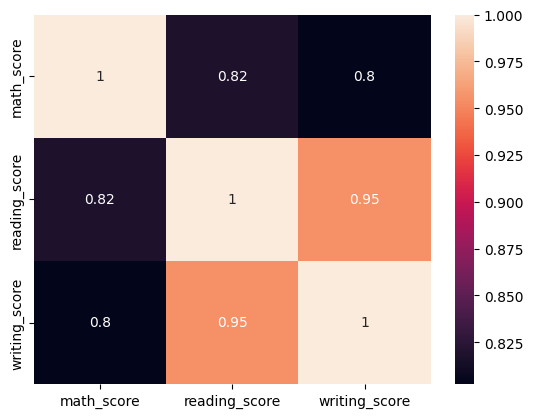

In [12]:
num_values= df.select_dtypes(exclude='object')
sns.heatmap(num_values.corr(), annot=True)

In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [15]:
df['race_ethnicity'].value_counts()

,count
race_ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [16]:
df['parental_level_of_education'].value_counts()

,count
parental_level_of_education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [17]:
df['lunch'].value_counts()

,count
lunch,
standard,645
free/reduced,355


In [18]:
df['test_preparation_course'].value_counts()

,count
test_preparation_course,
none,642
completed,358


In [19]:
df.shape

(1000, 8)

In [21]:
df.isna().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [22]:
df.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [26]:
[df[i].unique() for i in df.columns]

[array(['female', 'male'], dtype=object),
 array(['group B', 'group C', 'group A', 'group D', 'group E'],
       dtype=object),
 array(["bachelor's degree", 'some college', "master's degree",
        "associate's degree", 'high school', 'some high school'],
       dtype=object),
 array(['standard', 'free/reduced'], dtype=object),
 array(['none', 'completed'], dtype=object),
 array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
         50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
         97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
         39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
         98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
         35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
         19,  23,   8]),
 array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
         75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
         61,  

In [29]:
## categorising the features

cat_features= [feat for feat in df.columns if df[feat].dtypes=="O"]
print(f"The Categorical features are : {cat_features}\n length: {len(cat_features)}")

num_features= [feat for feat in df.columns if df[feat].dtypes!="O"]
print(f"The Numerical features are : {num_features}\n length: {len(num_features)}")

The Categorical features are : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
 length: 5
The Numerical features are : ['math_score', 'reading_score', 'writing_score']
 length: 3


## add New columns of Total Score and Average

In [30]:
df["Total_score"]= df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]= df["Total_score"]/3.0
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
## no of students with full marks

reading_full = df[df["reading_score"]==100]["Average"].count()
writing_full = df[df["writing_score"] == 100]["Average"].count()
Math_full = df[df["math_score"]==100]["Average"].count()


print(f"Total No of Students with full Marks in reading : {reading_full}")
print(f"Total No of Students with full Marks in Writing : {writing_full}")
print(f"Total No of Students with full Marks in Maths : {Math_full}")

Total No of Students with full Marks in reading : 17
Total No of Students with full Marks in Writing : 14
Total No of Students with full Marks in Maths : 7


In [41]:
## no fof students with less marks
reading_less = df[df["reading_score"] <= 20]["Average"].count()
writing_less = df[df["writing_score"] <= 20]["Average"].count()
Math_less = df[df["math_score"] <= 20]["Average"].count()


print(f"Total No of Students with less Marks in reading : {reading_less}")
print(f"Total No of Students with less Marks in Writing : {writing_less}")
print(f"Total No of Students with less Marks in Maths : {Math_less}")

Total No of Students with less Marks in reading : 1
Total No of Students with less Marks in Writing : 3
Total No of Students with less Marks in Maths : 4


## Histogram

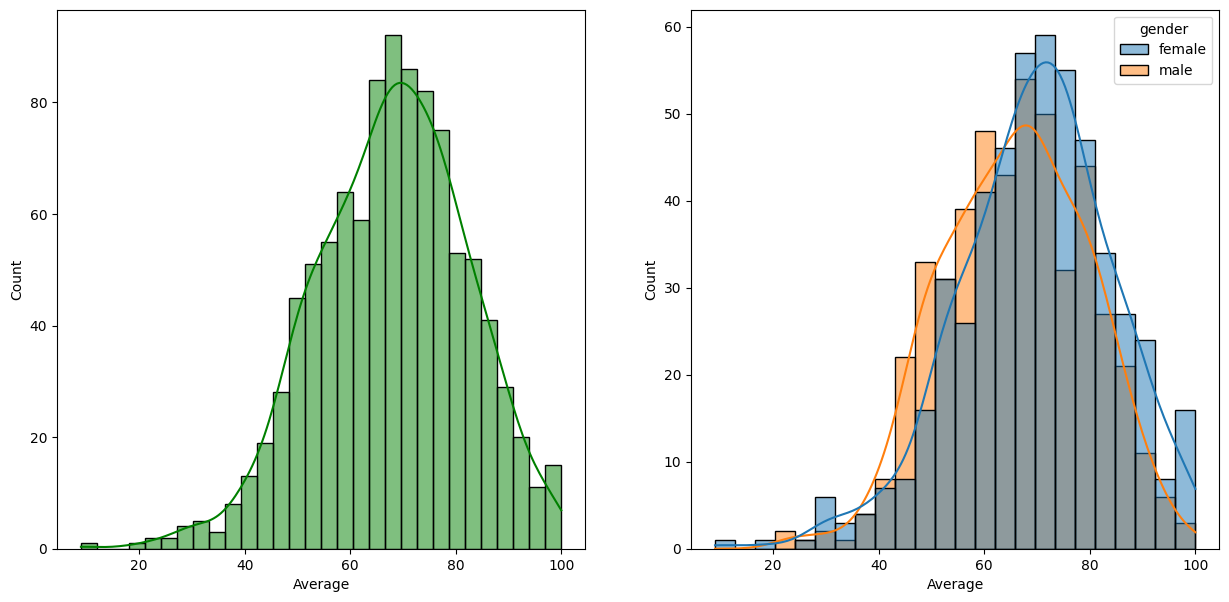

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

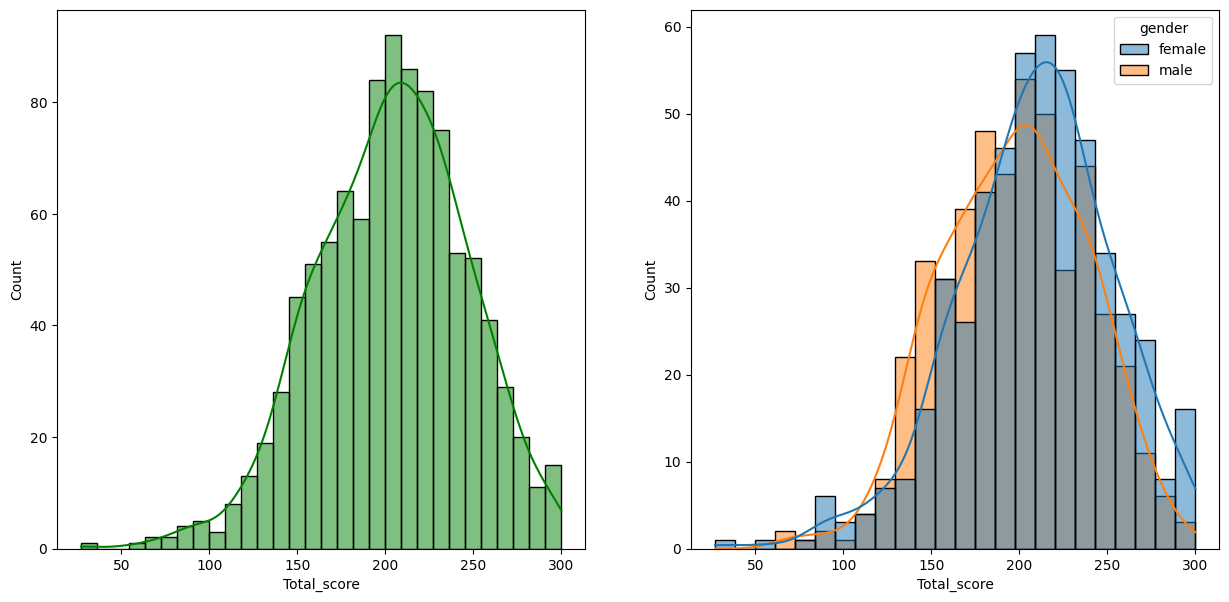

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

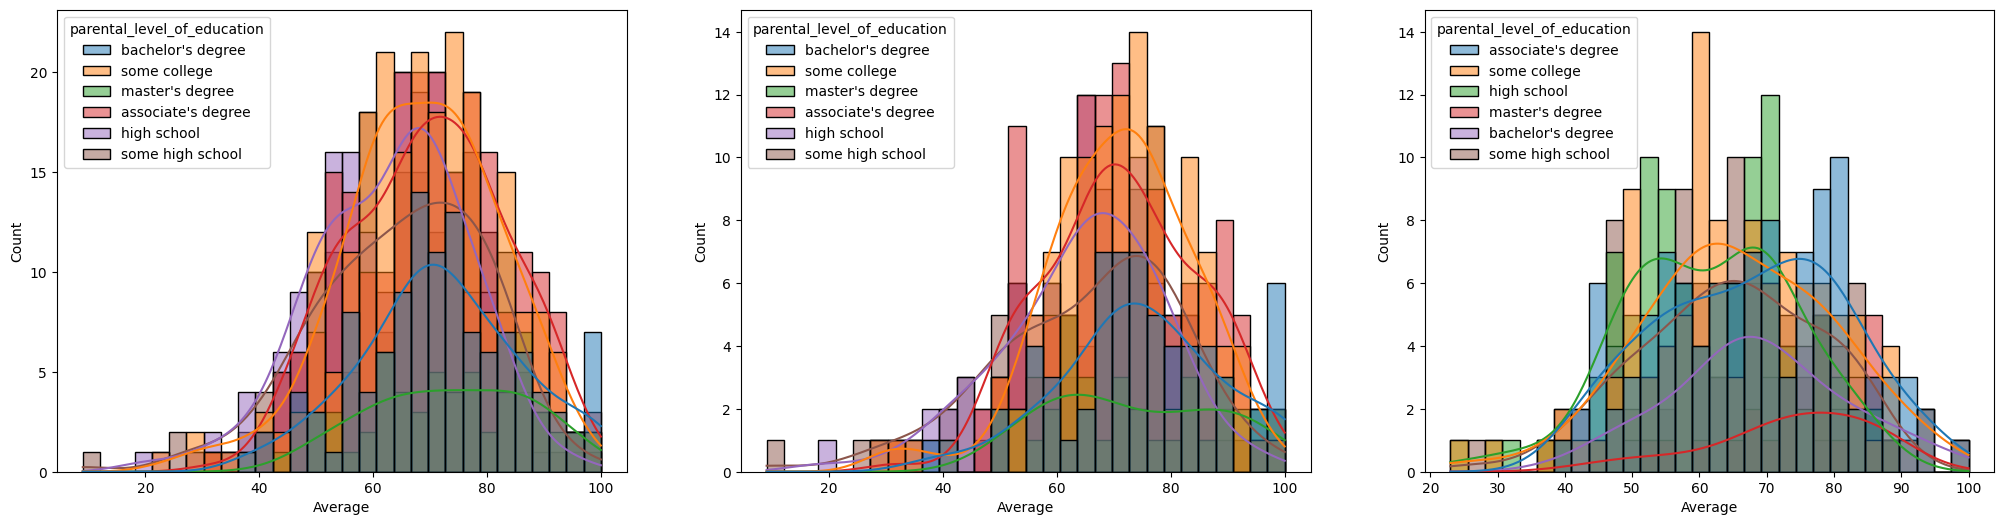

In [51]:
fig,axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g', hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='Average', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='Average',bins=30,kde=True, hue='parental_level_of_education')
plt.show()

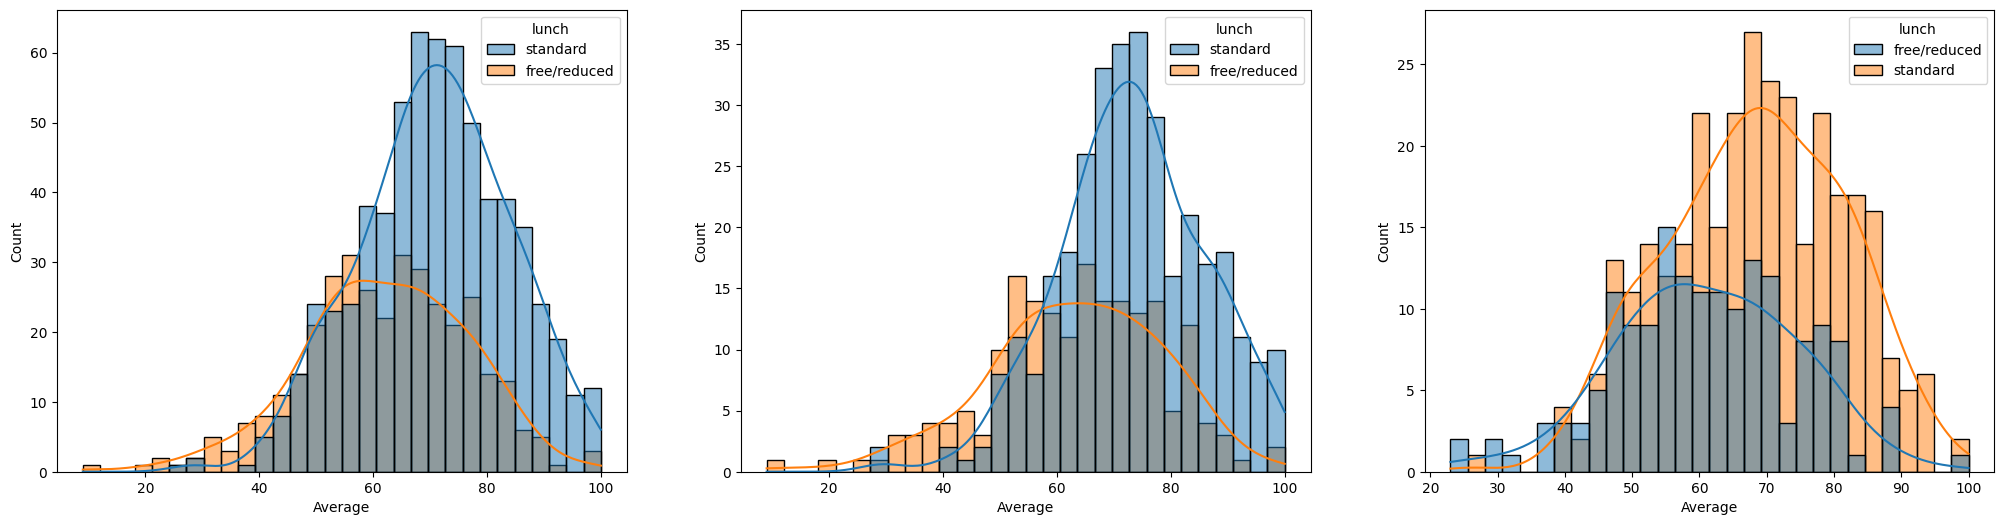

In [50]:
fig,axs= plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g', hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x='Average', bins=30, kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x='Average',bins=30,kde=True, hue='lunch')
plt.show()